In [1]:
import torch

In [2]:
w_true = torch.Tensor([1, 2, 3])
X = torch.cat([torch.ones(100, 1), torch.randn(100, 2)], 1)
y = torch.mv(X, w_true) + torch.randn(100) * 0.5

In [4]:
w = torch.randn(3, requires_grad=True)
gamma = .1

In [5]:
losses = []
for epoc in range(100):
    w.grad = None
    y_pred = torch.mv(X, w)
    loss = torch.mean((y - y_pred) ** 2)
    loss.backward()
    w.data = w.data - gamma * w.grad.data
    losses.append(loss.item())

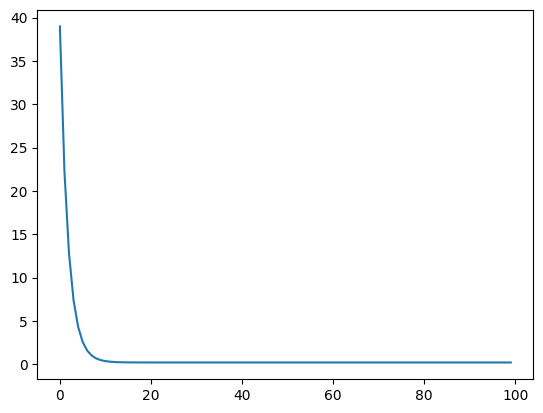

In [6]:
from matplotlib import pyplot as plt
plt.plot(losses)

In [7]:
w.data

tensor([1.0376, 1.9760, 3.0293])

In [8]:
from torch import nn, optim
net = nn.Linear(in_features=3, out_features=1, bias=False)

optimizer = optim.SGD(net.parameters(), lr=.1)
loss_fn = nn.MSELoss()

In [9]:
losses = []
for epoc in range(100):
    optimizer.zero_grad()
    result = net(X)
    loss = loss_fn(result.view_as(y), y)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

In [11]:
list(net.parameters())

[Parameter containing:
 tensor([[1.0376, 1.9760, 3.0293]], requires_grad=True)]

### <b style="color: #52ab76">로지스틱 회귀</b>

In [1]:
import torch
from torch import nn, optim
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
X = iris.data[:100]
y = iris.target[:100]

In [3]:
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

In [4]:
X.shape

torch.Size([100, 4])

In [5]:
net = nn.Linear(4, 1) # input 4, output 1
loss_fn = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(net.parameters(), lr=.25)

In [6]:
losses = []
for epoch in range(100):
    optimizer.zero_grad()

    result = net(X)
    loss = loss_fn(result.view_as(y), y)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

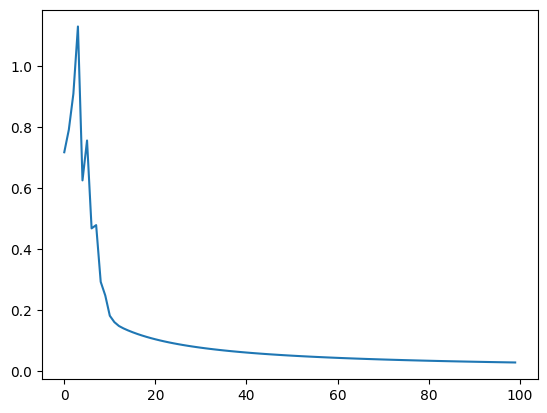

In [8]:
import matplotlib.pyplot as plt
plt.plot(losses)

In [11]:
list(net.parameters())

[Parameter containing:
 tensor([[ 0.0129, -1.8193,  2.0456,  0.7977]], requires_grad=True),
 Parameter containing:
 tensor([-0.7298], requires_grad=True)]

In [15]:
h = net(X)
prob = nn.functional.sigmoid(h)

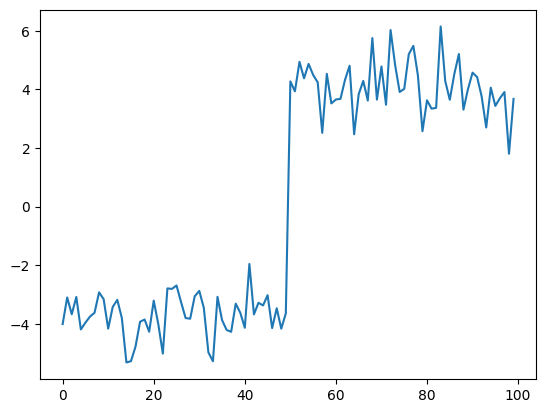

In [35]:
import numpy as np
plt.plot(h.detach().numpy())

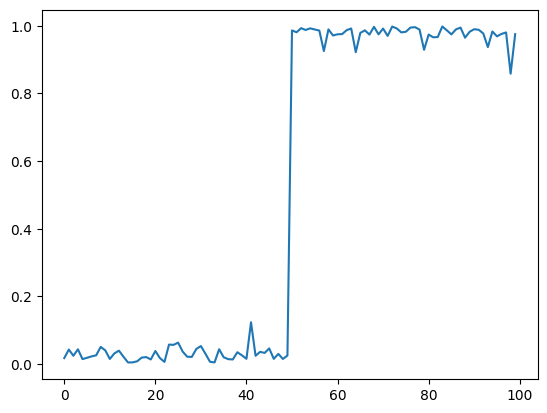

In [37]:
plt.plot(prob.detach().numpy())

In [38]:
y_pred = prob > .5
(y.byte() == y_pred.view_as(y)).sum().item()

100

### <b style="color: #52ab76">손글씨발</b>

In [63]:
import torch
from torch import nn, optim
from sklearn.datasets import load_digits
digits = load_digits()

X = digits.data
y = digits.target

X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.int64)

net = nn.Linear(X.size()[1], 10)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)

In [64]:
losses = []

for epoch in range(100):
    optimizer.zero_grad()
    result = net(X)
    loss = loss_fn(result, y) # y값은 자동으로 categorical 수행 되는듯
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

In [75]:
pred = net(X)
_, y_pred = torch.max(pred, 1) # _: 값, y_pred: 값의 index

In [76]:
(y_pred == y).sum().item() / len(y)

0.9449081803005008